In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('urldata.csv', encoding='latin1')

# Assuming the column of interest is named 'label'
# Replace 'label' with the actual name of your column
class_distribution = df['Category'].value_counts()

print(class_distribution)

Category
ham     48009
spam    47904
Name: count, dtype: int64


In [ ]:
# import pandas as pd

# # Assuming your dataframe is named df
# ham_df = df[df['Category'] == 'ham']
# spam_df = df[df['Category'] == 'spam']

# # Downsample the "ham" class
# ham_downsampled = ham_df.sample(n=len(spam_df), random_state=42)

# # Combine the downsampled "ham" class with the "spam" class
# balanced_df = pd.concat([ham_downsampled, spam_df])

# # Shuffle the dataframe to mix the rows
# balanced_df = balanced_df.sample(frac=1, random_state=42)

# # Define the file path where you want to save the new CSV file
# file_path = "URL.csv"

# # Store the balanced_df DataFrame to a new CSV file
# balanced_df.to_csv(file_path, index=False)


In [ ]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('URL.csv', encoding='latin1')

# Assuming the column of interest is named 'label'
# Replace 'label' with the actual name of your column
class_distribution = df['Category'].value_counts()

print(class_distribution)

Category
ham     48009
spam    47904
Name: count, dtype: int64


In [ ]:
import pandas as pd
 # Step 1: Load Excel File into DataFrame
df = pd.read_csv('URL.csv', encoding='latin1')


In [ ]:
def extract_domain(url):
    # Extract domain part (everything before the first /)
    domain = url.split('/')[0]
    return domain

# Apply the function to extract domain part
df['Domain'] = df['Data'].apply(extract_domain)

### Has IP

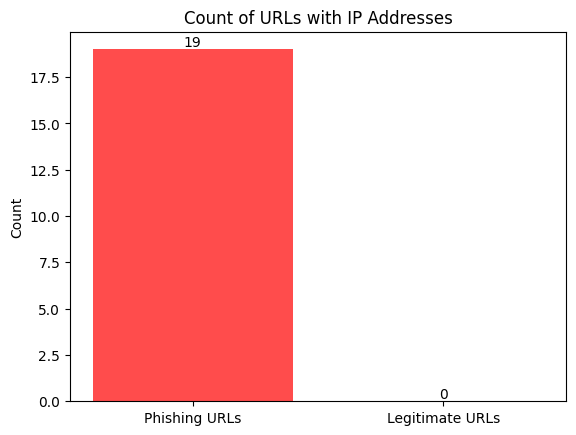

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Identify URLs with IP addresses
df['has_ip'] = df['Domain'].str.contains(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b').astype(int)

# Step 3: Plot Count of Phishing and Legitimate URLs with IP addresses
phishing_ip_counts = df[(df['Category'] == 'spam') & (df['has_ip'])]['Data'].count()
legitimate_ip_counts = df[(df['Category'] == 'ham') & (df['has_ip'])]['Data'].count()

# Plotting
plt.bar(['Phishing URLs', 'Legitimate URLs'], [phishing_ip_counts, legitimate_ip_counts], color=['red', 'blue'], alpha=0.7)

# Adding labels to the bars
plt.text(0, phishing_ip_counts , str(phishing_ip_counts), ha='center', va='bottom', color='black')
plt.text(1, legitimate_ip_counts , str(legitimate_ip_counts), ha='center', va='bottom', color='black')

plt.ylabel('Count')
plt.title('Count of URLs with IP Addresses')
plt.show()


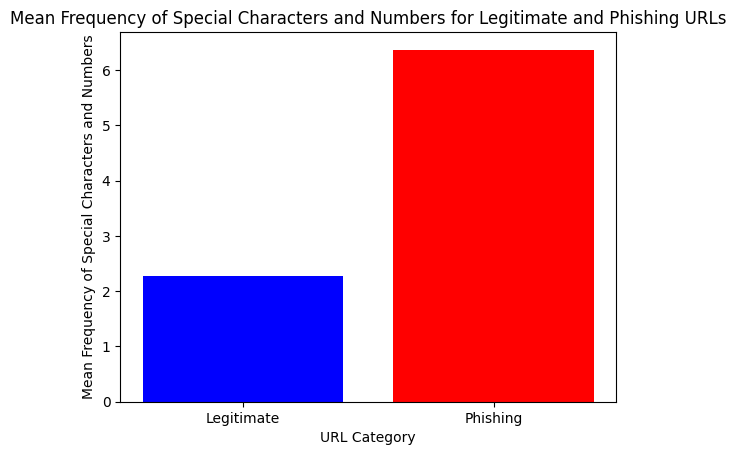

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Calculate Number of Special Characters and Numbers in Each URL
def count_special_and_numbers(url):
    return sum(not c.isalpha() for c in url)

df['special_and_numbers_count'] = df['Domain'].apply(count_special_and_numbers)

# Calculate mean frequency for each category
mean_legitimate = df[df['Category'] == 'ham']['special_and_numbers_count'].mean()
mean_phishing = df[df['Category'] == 'spam']['special_and_numbers_count'].mean()

# Plotting
plt.bar(['Legitimate', 'Phishing'], [mean_legitimate, mean_phishing], color=['blue', 'red'])
plt.xlabel('URL Category')
plt.ylabel('Mean Frequency of Special Characters and Numbers')
plt.title('Mean Frequency of Special Characters and Numbers for Legitimate and Phishing URLs')
plt.show()

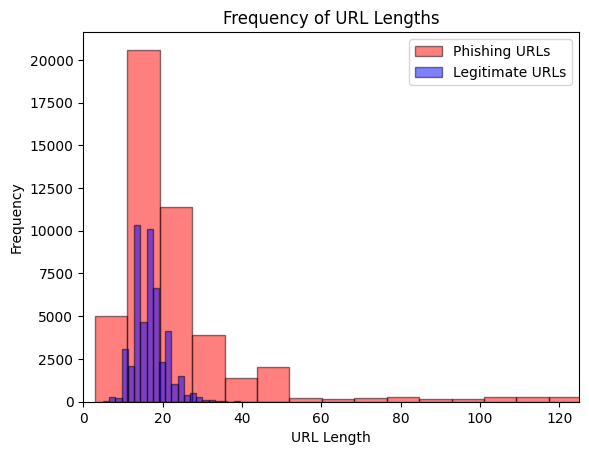

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Calculate Length of URLs
df['url_length'] = df['Domain'].apply(len)

# Step 3: Plot Frequency of URL Lengths for Phishing and Legitimate URLs
phishing_lengths = df[df['Category'] == 'spam']['url_length']
legitimate_lengths = df[df['Category'] == 'ham']['url_length']


plt.hist(phishing_lengths, bins=30, color='red', alpha=0.5, label='Phishing URLs', edgecolor='black')
plt.hist(legitimate_lengths, bins=30, color='blue', alpha=0.5, label='Legitimate URLs', edgecolor='black')

plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.title('Frequency of URL Lengths')
plt.legend()

# Set x-axis limit
plt.xlim(0, 125)

plt.show()


In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    # Split the path of the URL on the dot character
    s = urlparse(url).path.split('.')
    depth = 0
    for part in s:
        if part:
            depth += 1

    return depth

In [ ]:
df['depth'] = df['Domain'].apply(getDepth)

In [ ]:
# df['redirection'] = df['Domain'].apply(redirection)

In [ ]:
# # 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
# def httpDomain(url):
#   domain = urlparse(url).netloc
#   if 'https' in domain:
#     return 1
#   else:
#     return 0

In [ ]:
# df['http_https'] = df['Data'].apply(httpDomain)

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnchS\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
df['shortened_url'] = df['Domain'].apply(tinyURL)

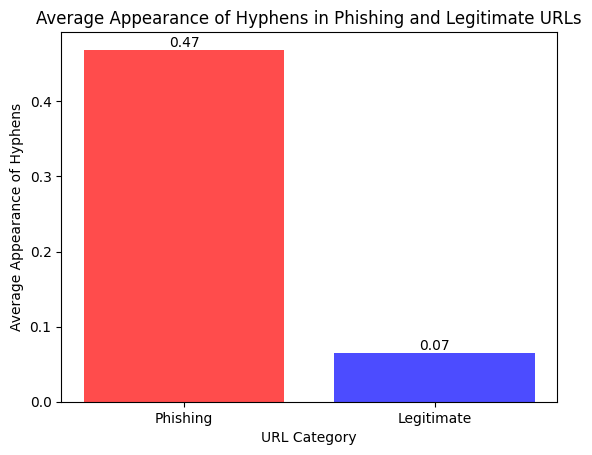

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to count the number of hyphens in the URL
def count_hyphens(url):
    urld =  url.split('/')[0]
    return urld.count('-')

# Apply the function to each URL and create a new column indicating the number of hyphens
df['hyphen_count'] = df['Domain'].apply(count_hyphens)


# Calculate average appearance of hyphens for phishing and legitimate URLs
avg_phishing_hyphens = df[df['Category'] == 'spam']['hyphen_count'].mean()
avg_legitimate_hyphens = df[df['Category'] == 'ham']['hyphen_count'].mean()

# Plotting
plt.bar(['Phishing', 'Legitimate'], [avg_phishing_hyphens, avg_legitimate_hyphens], color=['red', 'blue'], alpha=0.7)

# Adding text labels on top of the bars
plt.text(0, avg_phishing_hyphens, f'{avg_phishing_hyphens:.2f}', ha='center', va='bottom', color='black')
plt.text(1, avg_legitimate_hyphens, f'{avg_legitimate_hyphens:.2f}', ha='center', va='bottom', color='black')

plt.xlabel('URL Category')
plt.ylabel('Average Appearance of Hyphens')
plt.title('Average Appearance of Hyphens in Phishing and Legitimate URLs')
plt.show()


In [ ]:
# import pandas as pd
# import ssl
# import socket
# from datetime import datetime

# def check_ssl_expiry(domain):
#     try:
#         # Create a socket to connect to the domain
#         context = ssl.create_default_context()
#         with socket.create_connection((domain, 443)) as sock:
#             with context.wrap_socket(sock, server_hostname=domain) as ssock:
#                 # Get the SSL certificate
#                 cert = ssock.getpeercert()
#                 # Extract the expiry date from the certificate
#                 cert_expiry_date = datetime.strptime(cert['notAfter'], "%b %d %H:%M:%S %Y %Z")
#                 # Check if the certificate is expired
#                 print(cert_expiry_date)
#                 return 1 if cert_expiry_date < datetime.now() else 0
#     except Exception as e:
#         # If there's any error (e.g., connection error), consider the certificate as expired
#         return 1

# # Read the Excel file into a DataFrame
# df = pd.read_excel('URL.xlsx')

# # Create a new column to store the certificate expiry status
# df['CertificateExpired'] = df['Data'].apply(lambda url: check_ssl_expiry(url))

# # Save the DataFrame back to Excel
# df.to_excel('output.xlsx', index=False)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
print("Columns in the DataFrame:")
print(df.columns)


Columns in the DataFrame:
Index(['Data', 'Category', 'Domain', 'has_ip', 'special_and_numbers_count',
       'url_length', 'depth', 'shortened_url', 'hyphen_count'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Export DataFrame to an Excel file
df.to_csv('data.csv', index=False)  # Set index=False if you don't want to write row indices to the file
print("DataFrame has been exported to data.xlsx")

DataFrame has been exported to data.xlsx


In [ ]:
# from urllib.parse import urlparse
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# df = pd.read_excel("data1.xlsx")


# # Function to extract TLD from URL
# def extract_tld(url):
#     domain_parts = url.split('.')
#     tld = domain_parts[-1]
#     return tld

# # Apply function to extract TLD
# df['TLD'] = df['Domain'].apply(extract_tld)

# # Perform encoding (e.g., Label Encoding)
# label_encoder = LabelEncoder()
# df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])

# # Print DataFrame with encoded TLD
# print(df[['TLD', 'TLD_encoded']])


        TLD  TLD_encoded
0       com          177
1        ru          355
2       com          177
3       com          177
4        ru          355
...     ...          ...
45368   com          177
45369    me          292
45370    cf          163
45371  love          281
45372   org          327

[45373 rows x 2 columns]


In [ ]:
df.to_excel("data1.xlsx", index=False)

In [ ]:
# import pandas as pd
# import json
# from urllib.parse import urlparse

# # Load JSON data
# with open('data_legitimate.json') as f:
#     data_legitimate = json.load(f)

# with open('data_phishing.json') as f:
#     data_phishing = json.load(f)

# # Extract domain from URL
# def extract_domain(url):
#     parsed_url = urlparse(url)
#     return parsed_url.netloc

# # Extract domains and categories
# domains = []
# categories = []

# for url in data_legitimate:
#     domains.append(extract_domain(url))
#     categories.append(0)

# for url in data_phishing:
#     domains.append(extract_domain(url))
#     categories.append(1)

# # Create DataFrame
# df = pd.DataFrame({'Domain': domains, 'Category': categories})

# # Save to Excel
# df.to_excel('URL.xlsx', index=False)


In [ ]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('URL.xlsx')

# Drop duplicates based on the 'Domain' column, keeping the first occurrence
unique_domains = df.drop_duplicates(subset=['Domain', 'Category'])

# Save the unique domains and their corresponding labels to an Excel file
unique_domains.to_excel('unique_domains.xlsx', index=False)
